Question 1 


In [1]:
import pandas as pd
import numpy as np
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')

In [2]:
mean_age_per_occupation = users.groupby('occupation').age.mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [3]:
male_ratio_per_occupation = users[users.gender == 'M'].groupby('occupation').size()/users.groupby('occupation').size()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [4]:
min_max_age_per_occupation = users.groupby('occupation').age.agg(['min','max'])
print(min_max_age_per_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [5]:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender']).age.mean()
print(mean_age_per_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
percentage_women_men_per_occupation = users.groupby('occupation').gender.value_counts(normalize=True).mul(100).rename('percentage').reset_index()
print(percentage_women_men_per_occupation)

       occupation gender  percentage
0   administrator      M   54.430380
1   administrator      F   45.569620
2          artist      M   53.571429
3          artist      F   46.428571
4          doctor      M  100.000000
5        educator      M   72.631579
6        educator      F   27.368421
7        engineer      M   97.014925
8        engineer      F    2.985075
9   entertainment      M   88.888889
10  entertainment      F   11.111111
11      executive      M   90.625000
12      executive      F    9.375000
13     healthcare      F   68.750000
14     healthcare      M   31.250000
15      homemaker      F   85.714286
16      homemaker      M   14.285714
17         lawyer      M   83.333333
18         lawyer      F   16.666667
19      librarian      F   56.862745
20      librarian      M   43.137255
21      marketing      M   61.538462
22      marketing      F   38.461538
23           none      M   55.555556
24           none      F   44.444444
25          other      M   65.714286
2

Question 2 

In [7]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
#Assign it to a variable called euro12 
euro12 = euro12
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [8]:
len(euro12.Team.unique())

16

In [9]:
len(euro12.columns)

35

In [10]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

In [11]:
discipline.sort_values(['Red Cards','Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [12]:
discipline['Yellow Cards'].mean()

7.4375

In [13]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [14]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [15]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [16]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [17]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3

In [18]:
s1 = pd.Series(np.random.randint(1,5,100))
s2 = pd.Series(np.random.randint(1,4,100))
s3 = pd.Series(np.random.randint(10000,30000,100))

In [19]:
df = pd.concat([s1, s2, s3], axis=1)

In [20]:
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]

In [21]:
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3]))

In [22]:
df = df.reindex(range(300))

Question 4

In [23]:
import numpy as np
import datetime

In [24]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])

data2 = data.copy()

In [25]:
data2

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [26]:
data.rename(columns= {'Yr_Mo_Dy': 'Dates'},inplace=True) #step 3 
def fix_year(x): #step 4 we create a function to fix the table
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

data['Dates'] = data['Dates'].apply(fix_year)
data.set_index('Dates', inplace=True)#step 5
data.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Dates,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [27]:
missing_data = data.isnull().sum()
missing_data

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [28]:
#Compute how many non-missing values there are in total. 
total_data = data.notnull().sum()
total_data

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [29]:
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. 
mean_windspeed = data.mean().mean()
mean_windspeed

10.227982360836924

In [30]:
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. 
loc_stats = data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [31]:
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. 
day_stats = data.groupby(data.index).describe()
day_stats

RPT                                                 VAL         \
           count   mean std    min    25%    50%    75%    max count   mean   
Dates                                                                         
1961-01-01   1.0  15.04 NaN  15.04  15.04  15.04  15.04  15.04   1.0  14.96   
1961-01-02   1.0  14.71 NaN  14.71  14.71  14.71  14.71  14.71   0.0    NaN   
1961-01-03   1.0  18.50 NaN  18.50  18.50  18.50  18.50  18.50   1.0  16.88   
1961-01-04   1.0  10.58 NaN  10.58  10.58  10.58  10.58  10.58   1.0   6.63   
1961-01-05   1.0  13.33 NaN  13.33  13.33  13.33  13.33  13.33   1.0  13.25   
...          ...    ...  ..    ...    ...    ...    ...    ...   ...    ...   
1978-12-27   1.0  17.58 NaN  17.58  17.58  17.58  17.58  17.58   1.0  16.96   
1978-12-28   1.0  13.21 NaN  13.21  13.21  13.21  13.21  13.21   1.0   5.46   
1978-12-29   1.0  14.00 NaN  14.00  14.00  14.00  14.00  14.00   1.0  10.29   
1978-12-30   1.0  18.50 NaN  18.50  18.50  18.50  18.50  18.50   1.0  14.04   
1978-12-31   1.0  20.33 NaN  20.33  20.33  20.33  20.33  20.33   1.0  17.41   

            ...    BEL          MAL                                         \
            ...    75%    max count   mean std    min    25%    50%    75%   
Dates       ...                                                              
1961-01-01  ...  18.50  18.50   1.0  15.04 NaN  15.04  15.04  15.04  15.04   
1961-01-02  ...  17.54  17.54   1.0  13.83 NaN  13.83  13.83  13.83  13.83   
1961-01-03  ...  12.75  12.75   1.0  12.71 NaN  12.71  12.71  12.71  12.71   
1961-01-04  ...   5.46   5.46   1.0  10.88 NaN  10.88  10.88  10.88  10.88   
1961-01-05  ...  12.92  12.92   1.0  11.83 NaN  11.83  11.83  11.83  11.83   
...         ...    ...    ...   ...    ...  ..    ...    ...    ...    ...   
1978-12-27  ...  17.21  17.21   1.0  40.08 NaN  40.08  40.08  40.08  40.08   
1978-12-28  ...  21.79  21.79   1.0  41.46 NaN  41.46  41.46  41.46  41.46   
1978-12-29  ...  18.88  18.88   1.0  29.58 NaN  29.58  29.58  29.58  29.58   
1978-12-30  ...  14.67  14.67   1.0  28.79 NaN  28.79  28.79  28.79  28.79   
1978-12-31  ...  12.08  12.08   1.0  22.08 NaN  22.08  22.08  22.08  22.08   

                   
              max  
Dates              
1961-01-01  15.04  
1961-01-02  13.83  
1961-01-03  12.71  
1961-01-04  10.88  
1961-01-05  11.83  
...           ...  
1978-12-27  40.08  
1978-12-28  41.46  
1978-12-29  29.58  
1978-12-30  28.79  
1978-12-31  22.08  

[6574 rows x 96 columns]

In [32]:
data.index

Index([1961-01-01, 1961-01-02, 1961-01-03, 1961-01-04, 1961-01-05, 1961-01-06,
       1961-01-07, 1961-01-08, 1961-01-09, 1961-01-10,
       ...
       1978-12-22, 1978-12-23, 1978-12-24, 1978-12-25, 1978-12-26, 1978-12-27,
       1978-12-28, 1978-12-29, 1978-12-30, 1978-12-31],
      dtype='object', name='Dates', length=6574)

In [33]:
#Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. 
jan_windspeed = data.loc[pd.DatetimeIndex(data.index).month == 1].mean()
jan_windspeed

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [34]:
data.index

Index([1961-01-01, 1961-01-02, 1961-01-03, 1961-01-04, 1961-01-05, 1961-01-06,
       1961-01-07, 1961-01-08, 1961-01-09, 1961-01-10,
       ...
       1978-12-22, 1978-12-23, 1978-12-24, 1978-12-25, 1978-12-26, 1978-12-27,
       1978-12-28, 1978-12-29, 1978-12-30, 1978-12-31],
      dtype='object', name='Dates', length=6574)

In [35]:
#Downsample the record to a yearly frequency for each location.
data.index = pd.to_datetime(data.index)
yearly_data = data.resample('A').mean()
yearly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Dates,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [36]:
#Downsample the record to a monthly frequency for each location. 
monthly_data = data.resample('M').mean()
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Dates,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [37]:
#Downsample the record to a weekly frequency for each location. 
weekly_data = data.resample('W').mean()
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Dates,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [38]:
#Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks. 
weekly_stats = weekly_data.describe()
weekly_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


Question 5 

In [39]:
import pandas as pd
#Import the dataset from this address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
#Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

In [40]:
#See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [41]:
#What is the number of observations in the dataset?
chipo.shape[0]

4622

In [42]:
#What is the number of columns in the dataset?
chipo.shape[1]

5

In [43]:
#Print the name of all the columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [44]:
#How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [45]:
#Which was the most-ordered item?
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [46]:
#For the most-ordered item, how many items were ordered?
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1).values[0]

761

In [47]:
#What was the most ordered item in the choice_description column?
chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(1)

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

In [48]:
#How many items were orderd in total?
chipo.quantity.sum()

4972

In [49]:
#Turn the item price into a float
# Check the item price type 
chipo.item_price.dtype
# Create a lambda function and change the type of item price
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
# Check the item price type
chipo.item_price.dtype

dtype('float64')

In [50]:
#How much was the revenue for the period in the dataset?
revenue = (chipo['quantity']* chipo['item_price']).sum()


In [51]:
#How many orders were made in the period?
chipo.order_id.value_counts().count()
#What is the average revenue amount per order?
revenue/chipo.order_id.value_counts().count()

21.39423118865867

In [52]:
#How many different items are sold?
chipo.item_name.value_counts().count()

50

Question 6

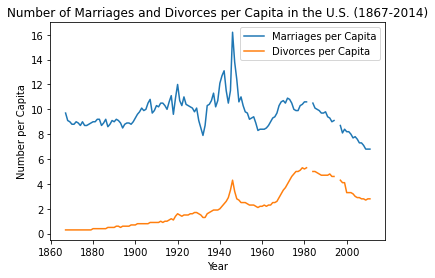

In [53]:
import matplotlib.pyplot as plt 
# Read in data from csv file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Set x-axis values for the years for which data is available
years = data['Year'].tolist()

# Set y-axis values for the number of marriages and divorces per capita
marriages = data['Marriages_per_1000'].tolist()
divorces = data['Divorces_per_1000'].tolist()

# Create line plot
plt.plot(years, marriages, label='Marriages per Capita')
plt.plot(years, divorces, label='Divorces per Capita')

# Set plot labels
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Create legend
plt.legend()

# Show plot
plt.show()

Question 7

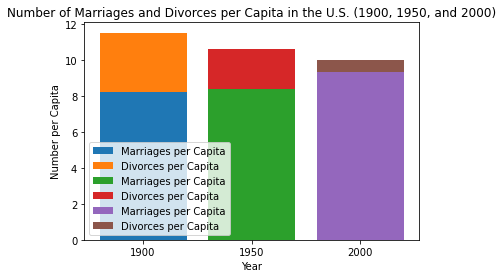

In [54]:
# Create bar chart
plt.bar('1900', marriages[133], label='Marriages per Capita')
plt.bar('1900', divorces[133], label='Divorces per Capita', bottom=marriages[133])
plt.bar('1950', marriages[93], label='Marriages per Capita')
plt.bar('1950', divorces[93], label='Divorces per Capita', bottom=marriages[93])
plt.bar('2000', marriages[33], label='Marriages per Capita')
plt.bar('2000', divorces[33], label='Divorces per Capita', bottom=marriages[33])

# Set plot labels
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')

# Create legend
plt.legend()

# Show plot
plt.show()

Question 8

In [55]:
#read in the csv file
df = pd.read_csv('actor_kill_counts.csv')

df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


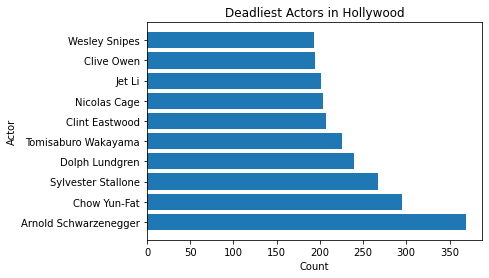

In [56]:
#sort the dataframe by the kill count
df.sort_values('Count', ascending=False, inplace=True)
#plot the horizontal bar chart
plt.barh('Actor', 'Count', data=df)
#add labels to the x and y axes
plt.xlabel('Count')
plt.ylabel('Actor')
#add a title
plt.title('Deadliest Actors in Hollywood')
#show the chart
plt.show()

Question 9

In [57]:
# Read in data from csv file
data = pd.read_csv('roman-emperor-reigns.csv')
data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


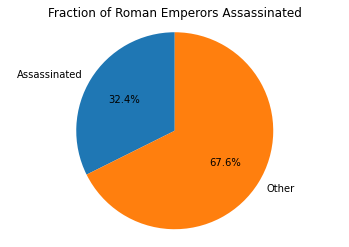

In [58]:
# Read in data from csv file
data = pd.read_csv('roman-emperor-reigns.csv')
# Count number of assassinated emperors
assassinated = data['Cause_of_Death'].value_counts()['Assassinated']
# Count total number of emperors
total = data.shape[0]
# Calculate fraction of emperors assassinated
fraction_assassinated = assassinated/total
# Create list of labels
labels = ['Assassinated', 'Other']
# Create list of sizes
sizes = [fraction_assassinated, 1-fraction_assassinated]
# Create figure
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Make sure pie chart is an even circle
ax1.axis('equal')  
# Add title
plt.title('Fraction of Roman Emperors Assassinated')
# Show plot
plt.show()

Question 10

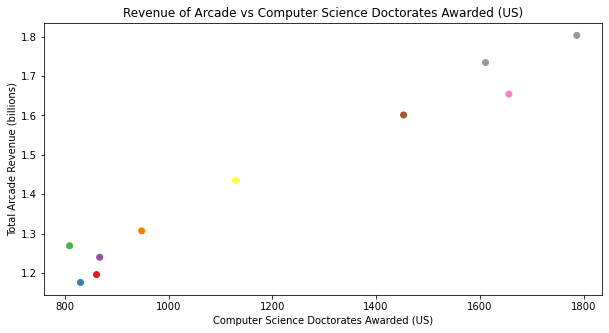

In [59]:
#importing csv file
import pandas as pd
import matplotlib.pyplot as plt

#reading data from csv file 
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

#setting x-axis and y-axis data
x = df['Computer Science Doctorates Awarded (US)']
y = df['Total Arcade Revenue (billions)']

#setting size of the graph
plt.figure(figsize=(10,5))

#adding title to graph
plt.title('Revenue of Arcade vs Computer Science Doctorates Awarded (US)')

#adding labels to x-axis and y-axis
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')

#creating scatter plot and coloring each dot according to its year
plt.scatter(x, y, c=df['Year'], cmap='Set1')

#showing plot
plt.show()